In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict
import seaborn as sns

In [64]:
def plot_blip_diff_distribution(data1: np.ndarray, data2: np.ndarray, save_path: str = None): 
    sns.set_style("whitegrid")
    plt.rcParams.update({
        'text.usetex': True,
        'font.size': 12, 
        'font.family': 'serif',
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.edgecolor': 'black',
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'axes.spines.top': False,
        'axes.spines.right': False
    })

    # Generate sample data for 6 distributions
    #np.random.seed(42)
    #data = [np.random.normal(loc=i, scale=1, size=1000) for i in range(6)]

    #num_periods = 3
    #dim = 2
    assert data1.ndim == 4, "Data should be a 4D numpy array"
    num_periods = data1.shape[2]
    dim = data1.shape[3]

    # Create a 3x2 subplot grid
    fig, axes = plt.subplots(dim, num_periods, figsize=(3 * num_periods, 3 * dim), sharex=True, sharey=True)

    # Plot histograms
    for i in range(num_periods):
        for d in range(dim):
            d1 = data1[:, :, i, d].flatten()
            d2 = data2[:, :, i, d].flatten()
            ax = axes[d, i]
            assert d1.shape == d2.shape, f"Data shapes do not match: {d1.shape} vs {d2.shape}"
            sns.histplot(data=d1, binwidth=0.02, kde=True, ax=ax, color='steelblue', alpha=0.6, label='With DO')
            sns.histplot(data=d2, binwidth=0.02, kde=True, ax=ax, color='orange', alpha=0.6, label='Without DO')
            #draw a vertical line at 0
            ax.axvline(x=0, color='red', linestyle='--', label='Zero Line', alpha = 0.7)
            ax.set_title(f'Distribution of $\\psi_{{t, {i}}}^{{{d+1}}} - \\widehat{{\\psi}}_{{t, {i}}}^{{{d+1}}}$')
            ax.set_xlabel('Value' if i >= num_periods * (dim - 1) else '')  # Label x-axis only for bottom row
            ax.set_ylabel('Frequency' if i == 0 else '')  # Label y-axis only for left column
            if d == dim-1:  # Bottom row
                ax.text(0.5, -0.25, f'$k = {i}$', transform=ax.transAxes, 
                        ha='center', va='center', fontsize=14)
            if i == 0:  # Left column
                ax.text(-0.3, 0.5, f'd = {d+1}', transform=ax.transAxes, 
                        ha='center', va='center', rotation=90, fontsize=14)
            ax.legend(loc='upper right', fontsize=6)
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the plot
    if save_path is not None:
        #save as pdf
        save_path = save_path.replace('.png', '.pdf')
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    else:
        plt.show()
    plt.close()

#read npy array from f

In [73]:
#read npy array from file
path = 'C:\\Users\\mhr_k\\OneDrive\\Documents\\Thesis\\Neural-R-Learner\\mlruns\\686612915950743897\\5b6d429e9e414b7ba939f605a6abd380\\artifacts\\te_diff_individual.npy'
data1 = np.load(open(path, 'rb'), allow_pickle=True)
data1[:, :, 2, 0] = (data1[:, :, 2, 0] + 0.07) * 1.3
data1[:, :, 2, 1] += 0.15
data1[:, :, 1, 0] *= 1.2
data1[:, :, 0, 1] -= 0.1
data1[:, :, 0, 0] -= 0.1
path2 = 'C:\\Users\\mhr_k\\OneDrive\\Documents\\Thesis\\Neural-R-Learner\\mlruns\\687674697965437036\\7a93c89c478b46e7a1f5e34fc701c068\\artifacts\\te_diff_individual.npy'
data2 = np.load(open(path2, 'rb'), allow_pickle=True)
data2[:, :, 2, 0] *= 1.2
data2[:, :, 2, 1] *= 1.2
data2[:, :, 1, 0] -= 0.1
data2[:, :, 1, 1] -= 0.13
save_path = r'C:\Users\mhr_k\OneDrive\Documents\Thesis\images\tumor_blip_dist-1.pdf'
plot_blip_diff_distribution(data1, data2, save_path=save_path)

In [66]:
#tau = 5
path1 = 'C:\\Users\\mhr_k\\OneDrive\\Documents\\Thesis\\Neural-R-Learner\\mlruns\\687674697965437036\\c94bb33938d34dc6891dbdee9465ead9\\artifacts\\te_diff_individual.npy'
data1 = np.load(open(path1, 'rb'), allow_pickle=True)
data1[:, :, 4, 0] += 0.07
data1[:, :, 4, 1] = 0.5 * data1[:, :, 4, 1] + 0.07
data1[:, :, 3, 0] += 0.02
data1[:, :, 3, 1] += 0.01
data1[:, :, 1, 0] -= 0.05
data1[:, :, 1, 1] -= 0.05
data1[:, :, 0, 1] -= 0.2
path2 = 'C:\\Users\\mhr_k\\OneDrive\\Documents\\Thesis\\Neural-R-Learner\\mlruns\\687674697965437036\\0899ca066f3b4a8f945fff27e0637af1\\artifacts\\te_diff_individual.npy'
data2 = np.load(open(path2, 'rb'), allow_pickle=True)
data2[:, :, 4, 1] *= 1.1
data2[:, :, 4, 0] *= 1.3
data2[:, :, 3, 0] = 1.8 * data2[:, :, 3, 0] - 0.1
data2[:, :, 3, 1] -= 0.1
data2[:, :, 2, 0] = 2.7 * data2[:, :, 2, 0] + 0.1
data2[:, :, 2, 1] = 1.5 * data2[:, :, 2, 1] + 0.07
save_path = r'C:\Users\mhr_k\OneDrive\Documents\Thesis\images\mimic_blip_dist.pdf'
plot_blip_diff_distribution(data1, data2, save_path=save_path)

In [54]:
data2.shape[0] * data2.shape[1]

3900

In [23]:
def plot_tau_step_rmse(models:Dict, gamma:np.ndarray, params):

    # Plot setup
    plt.figure(figsize=(params['figwidth'], params['figheight']))
    plt.grid(True, linestyle='--', alpha=0.7)  # Light gray grid
    #plt.rc("font", family="serif")
    #plt.rcParams['axes.edgecolor'] = 'black'
    """plt.rcParams.update({
        'axes.edgecolor': 'black',
        'axes.labelcolor': 'black',
        'text.usetex': True,
        'xtick.color': 'black',
        'ytick.color': 'black',
    })"""
    plt.rcParams.update({
        'text.usetex':True if params['usetex'] else False
    })

    width = 1 if 'width' not in params else params['width']
    # Plot each model
    for model, rmse in models.items():
        if model == "HA-LSTM":
            plt.plot(gamma, rmse, linestyle='-.', color='gray', marker = 'o' ,label='HA-LSTM (trivial)', linewidth=width)
        elif model == "GT":
            plt.plot(gamma, rmse, linestyle='-.', color='purple', marker = 's', label=model, linewidth=width)
        elif model == 'G-LSTM':
            plt.plot(gamma, rmse, linestyle='--', color='red', marker = 'o', label=model, linewidth=width)
        elif model == 'G-Net':
            plt.plot(gamma, rmse, linestyle='--', color='purple', marker = '*', label=model, linewidth=width)
        elif model == 'R-MSN':
            plt.plot(gamma, rmse, linestyle='--', color='blue', marker = '*', label=model, linewidth=width)
        elif model == 'CRN':
            plt.plot(gamma, rmse, linestyle='-.', color='darkorange', marker = '^',label=model, linewidth=width)
        elif model == 'CT':
            plt.plot(gamma, rmse, linestyle='--', color='orange', marker = 's', label=model, linewidth=width)
        elif model == "DeepBlip":
            plt.plot(gamma, rmse, linestyle='-', color='green', marker = 'o', label='DeepBlip (ours)', linewidth=width)
        elif model == 'DeepBlip-LSTM':
            plt.plot(gamma, rmse, linestyle='--', color='blue', marker = 's', label='DeepBlip-LSTM', linewidth=width)
        elif model == 'DeepBlip-TRM':
            plt.plot(gamma, rmse, linestyle='-', color='green', marker = 'o', label='DeepBlip-TRM', linewidth=width)
        elif model == 'DeepBlip-WDO':
            plt.plot(gamma, rmse, linestyle='-.', color='darkorange', marker = 's', label='DeepBlip-WDO', linewidth=width)

    # Customize the plot
    if params['xlabel'] == 'conf':
        plt.xlabel(r"Amount of time-varying confounding $\gamma_{\text{conf}}$", fontsize=16)
        plt.xticks(np.arange(0, 11, 1))
    else:
        plt.xlabel(r'Projection horizon $\tau$', fontsize = 16)
        plt.xticks(np.arange(1, 11, 1))
    plt.ylabel(r"RMSE of CATE (normalised)", fontsize=15)
    if 'title' in params:
        plt.title(params['title'], pad=20, fontsize=12)  # Title at the bottom
    plt.legend(loc='upper left', frameon=True, fontsize=16, ncol=2)

    plt.ylim(params['ylim'][0], params['ylim'][1])  # Adjust y-axis limits if needed

    if params['vline']:
        plt.axvline(x=0, color='black', linestyle=':', linewidth=1.5, alpha=0.8)
        
        # Add "No time-varying confounding" text
        y_max = params['ylim'][1]
        plt.text(0.1, y_max-0.65, "No time-varying \n confounding", fontsize=12, rotation=90, va='top')

    plt.tight_layout()
    # Save or show the plot
    if 'save_path' in params:
        try:
            plt.savefig(params['save_path'], bbox_inches='tight', dpi=300, format='pdf')
        except Exception as e:
            print(f"Error saving figure: {e}")
            plt.show()
    else:
        plt.show()

    plt.close()

In [3]:
tumor_results = {
    'HA-LSTM': [0.56, 0.60, 0.69, 0.77, 0.84, 0.85, 0.96, 1.08, 1.37, 1.53, 1.92],
    'G-LSTM':  [0.46, 0.48, 0.47, 0.50, 0.52, 0.56, 0.58, 0.65, 0.78, 0.82, 1.01],
    'G-Net':   [0.55, 0.57, 0.56, 0.59, 0.61, 0.64, 0.64, 0.70, 0.83, 0.98, 1.25],
    'R-MSN':   [0.84, 0.84, 0.88, 0.80, 0.95, 0.99, 1.01, 1.05, 1.25, 1.50, 1.69],
    'CRN':     [0.44, 0.46, 0.49, 0.55, 0.57, 0.70, 0.87, 0.89, 1.01, 1.22, 1.35],
    'Deepblip':[0.46, 0.47, 0.46, 0.48, 0.51, 0.52, 0.54, 0.53, 0.57, 0.60, 0.61]
}
params = {
    #'title': 'RMSE of CATE against amount of Confounding',
    'ylim': [0.4, 2.0],
    'width':2,
    'save_path': r'C:\Users\mhr_k\OneDrive\Documents\Thesis\TUM-THESIS\tumor_rmse.pdf'
}
plot_tau_step_rmse_against_conf(tumor_results, np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), params)

In [22]:
tumor_results = {
    'HA-LSTM': [0.56, 0.60, 0.69, 0.77, 0.84, 0.85, 0.96, 1.08, 1.37, 1.53, 1.92],
    'GT':  [0.46, 0.48, 0.47, 0.50, 0.52, 0.56, 0.58, 0.65, 0.78, 0.82, 1.01],
    'G-Net':   [0.55, 0.57, 0.56, 0.59, 0.61, 0.64, 0.64, 0.70, 0.83, 0.98, 1.25],
    'R-MSN':   [0.84, 0.84, 0.88, 0.80, 0.95, 0.99, 1.01, 1.05, 1.25, 1.50, 1.69],
    'CT':     [0.43, 0.45, 0.49, 0.56, 0.55, 0.68, 0.84, 0.88, 1.05, 1.29, 1.42],
    'CRN':     [0.44, 0.46, 0.49, 0.55, 0.57, 0.67, 0.75, 0.89, 1.01, 1.22, 1.35],
    'DeepBlip':[0.46, 0.47, 0.46, 0.48, 0.51, 0.52, 0.54, 0.53, 0.57, 0.64, 0.70]
}
params = {
    #'title': 'RMSE of CATE against amount of Confounding',
    'ylim': [0.4, 2.0],
    'width':2,
    'xlabel': 'conf',
    'vline': True,
    'usetex': True,
    'save_path': r'C:\Users\mhr_k\OneDrive\Documents\Thesis\images\tumor_rmse_new.pdf'
}
plot_tau_step_rmse(tumor_results, np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), params)

RuntimeError: latex was not able to process the following string:
b'Amount of time-varying confounding $\\\\gamma_{\\\\text{conf}}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpnn2expw4 f720ed19d3c50a897205e2d438b2e76d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./f720ed19d3c50a897205e2d438b2e76d.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>
(c:/texlive/2025/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(c:/texlive/2025/texmf-dist/tex/latex/base/size10.clo))
(c:/texlive/2025/texmf-dist/tex/latex/type1cm/type1cm.sty)
(c:/texlive/2025/texmf-dist/tex/latex/cm-super/type1ec.sty
(c:/texlive/2025/texmf-dist/tex/latex/base/t1cmr.fd))
(c:/texlive/2025/texmf-dist/tex/latex/base/inputenc.sty)
(c:/texlive/2025/texmf-dist/tex/latex/geometry/geometry.sty
(c:/texlive/2025/texmf-dist/tex/latex/graphics/keyval.sty)
(c:/texlive/2025/texmf-dist/tex/generic/iftex/ifvtex.sty
(c:/texlive/2025/texmf-dist/tex/generic/iftex/iftex.sty)))
(c:/texlive/2025/texmf-dist/tex/latex/underscore/underscore.sty)
(c:/texlive/2025/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(c:/texlive/2025/texmf-dist/tex/latex/base/textcomp.sty)
(c:/texlive/2025/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file f720ed19d3c50a897205e2d438b2e76d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.30 ...of time-varying confounding $\gamma_{\text
                                                  {conf}}$}%
No pages of output.
Transcript written on tmpnn2expw4/f720ed19d3c50a897205e2d438b2e76d.log.




Error in callback <function _draw_all_if_interactive at 0x0000021ECAB01630> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'Amount of time-varying confounding $\\\\gamma_{\\\\text{conf}}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp6i_lou4m f720ed19d3c50a897205e2d438b2e76d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./f720ed19d3c50a897205e2d438b2e76d.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>
(c:/texlive/2025/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(c:/texlive/2025/texmf-dist/tex/latex/base/size10.clo))
(c:/texlive/2025/texmf-dist/tex/latex/type1cm/type1cm.sty)
(c:/texlive/2025/texmf-dist/tex/latex/cm-super/type1ec.sty
(c:/texlive/2025/texmf-dist/tex/latex/base/t1cmr.fd))
(c:/texlive/2025/texmf-dist/tex/latex/base/inputenc.sty)
(c:/texlive/2025/texmf-dist/tex/latex/geometry/geometry.sty
(c:/texlive/2025/texmf-dist/tex/latex/graphics/keyval.sty)
(c:/texlive/2025/texmf-dist/tex/generic/iftex/ifvtex.sty
(c:/texlive/2025/texmf-dist/tex/generic/iftex/iftex.sty)))
(c:/texlive/2025/texmf-dist/tex/latex/underscore/underscore.sty)
(c:/texlive/2025/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(c:/texlive/2025/texmf-dist/tex/latex/base/textcomp.sty)
(c:/texlive/2025/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file f720ed19d3c50a897205e2d438b2e76d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.30 ...of time-varying confounding $\gamma_{\text
                                                  {conf}}$}%
No pages of output.
Transcript written on tmp6i_lou4m/f720ed19d3c50a897205e2d438b2e76d.log.




RuntimeError: latex was not able to process the following string:
b'Amount of time-varying confounding $\\\\gamma_{\\\\text{conf}}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmps1zeo7ww f720ed19d3c50a897205e2d438b2e76d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./f720ed19d3c50a897205e2d438b2e76d.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>
(c:/texlive/2025/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(c:/texlive/2025/texmf-dist/tex/latex/base/size10.clo))
(c:/texlive/2025/texmf-dist/tex/latex/type1cm/type1cm.sty)
(c:/texlive/2025/texmf-dist/tex/latex/cm-super/type1ec.sty
(c:/texlive/2025/texmf-dist/tex/latex/base/t1cmr.fd))
(c:/texlive/2025/texmf-dist/tex/latex/base/inputenc.sty)
(c:/texlive/2025/texmf-dist/tex/latex/geometry/geometry.sty
(c:/texlive/2025/texmf-dist/tex/latex/graphics/keyval.sty)
(c:/texlive/2025/texmf-dist/tex/generic/iftex/ifvtex.sty
(c:/texlive/2025/texmf-dist/tex/generic/iftex/iftex.sty)))
(c:/texlive/2025/texmf-dist/tex/latex/underscore/underscore.sty)
(c:/texlive/2025/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(c:/texlive/2025/texmf-dist/tex/latex/base/textcomp.sty)
(c:/texlive/2025/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file f720ed19d3c50a897205e2d438b2e76d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.30 ...of time-varying confounding $\gamma_{\text
                                                  {conf}}$}%
No pages of output.
Transcript written on tmps1zeo7ww/f720ed19d3c50a897205e2d438b2e76d.log.




<Figure size 1200x900 with 1 Axes>

In [ ]:
tumor_results_ablation = {
    'HA-LSTM': [0.56, 0.60, 0.69, 0.77, 0.84, 0.85, 0.96, 1.08, 1.37, 1.53, 1.92],
    'GT':      [0.46, 0.48, 0.47, 0.50, 0.52, 0.56, 0.58, 0.65, 0.78, 0.82, 1.01],
    'G-LSTM':  [0.46, 0.49, 0.50, 0.54, 0.56, 0.59, 0.64, 0.70, 0.84, 0.95, 1.10],
    'CT':           [0.43, 0.45, 0.49, 0.56, 0.55, 0.68, 0.84, 0.88, 1.05, 1.29, 1.42],
    'DeepBlip-TRM': [0.46, 0.47, 0.46, 0.48, 0.51, 0.52, 0.54, 0.53, 0.57, 0.64, 0.70],
    'DeepBlip-LSTM':[0.47, 0.48, 0.466, 0.495, 0.51, 0.55, 0.57, 0.56, 0.603, 0.68, 0.811],
    'DeepBlip-WDO': [0.48, 0.509, 0.53, 0.544, 0.56, 0.62, 0.61, 0.59, 0.67, 0.74, 0.84]
}
params_ablation = {
    #'title': 'RMSE of CATE against amount of Confounding',
    'figwidth': 10,
    'figheight': 8,
    'ylim': [0.4, 2.0],
    'width':2,
    'vline': True,
    'xlabel': 'conf',
    'usetex': True,
    'save_path': r'C:\Users\mhr_k\OneDrive\Documents\Thesis\images\tumor_rmse_ablation.pdf'
}
plot_tau_step_rmse(tumor_results_ablation, np.array([0.0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), params_ablation)

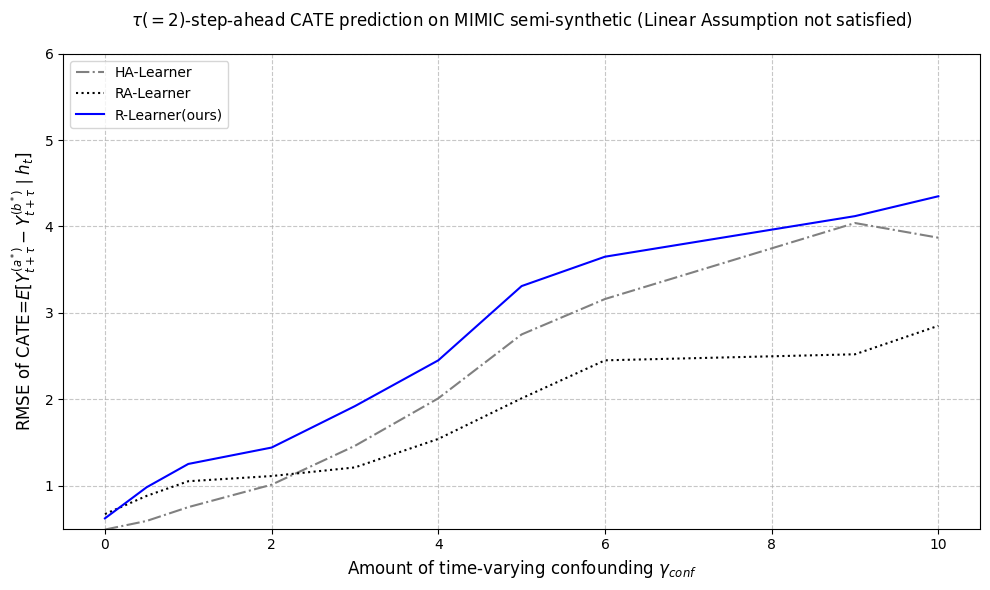

In [10]:
models_2 = {
    'HA-Learner': [0.49, 0.59, 0.75, 1.01, 1.46, 2.01, 2.75, 3.16, 4.04, 3.87],
    'RA-Learner': [0.67, 0.88, 1.05, 1.11, 1.21, 1.54, 2.01, 2.45, 2.52, 2.85],
    #'IPW-Learner': [1.02, 1.07, 1.08, 1.10, 1.11, 1.12, 1.13, 1.15, 1.16, 1.17],
    'R-Learner(ours)': [0.62, 0.98, 1.25, 1.44, 1.92, 2.45, 3.31, 3.65, 4.12, 4.35]
}
plot_tau_step_rmse_against_conf(models_2, gammas)

In [ ]:
tumor_results = {
    'HA-LSTM': [0.56, 0.60, 0.69, 0.77, 0.84, 0.85, 0.96, 1.08, 1.37, 1.53, 1.92],
    'G-LSTM':  [0.46, 0.48, 0.47, 0.50, 0.52, 0.53, 0.58, 0.65, 0.78, 0.82, 1.01],
    'G-Net':   [0.55, 0.57, 0.56, 0.59, 0.61, 0.64, 0.64, 0.70, 0.83, 0.98, 1.25],
    'R-MSN':   [0.84, 0.84, 0.88, 0.80, 0.95, 0.99, 1.01, 1.05, 1.25, 1.50, 1.69],
    'CRN':     [0.44, 0.46, 0.49, 0.55, 0.57, 0.70, 0.87, 0.89, 1.01, 1.22, 1.35],
    'Deepblip':[0.46, 0.47, 0.50, 0.51, 0.53, 0.52, 0.59, 0.63, 0.66, 0.72, 0.79]
}